# Data Visualization and Regression Analysis
This is the second part of my project on Japanese web novel title length. In this notebook, I am going to use data visualization and regression analysis to find answers for the following questions:<br>
- Is it true that Japanese web novel titles are getting longer and longer over time?<br>
- Are longer titles correlated with more views?<br>
- Are longer titles correlated with the number of readers who actually read the novel?<br>
- Are longer titles correlated with a better rating?<br>

## Import the Dataset

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_excel('japanesewebnovel.xlsx')
df = df[['ID','Title_Length','Weekly_Viewers','Bookmarks','Average_Score','Genre','Complete','Year','Latest_Update','Word_Count','Reviews','Parts','Average_Length']]
df['No_update'] = np.where(((df['Complete'] == 'On Going') & (df['Latest_Update'] < 2021)) , 1, 0)
df['Complete'] = df['Complete'].replace(['Completed','On Going'], [1,0])
df.head()

,ID,Title_Length,Weekly_Viewers,Bookmarks,Average_Score,Genre,Complete,Year,Latest_Update,Word_Count,Reviews,Parts,Average_Length,No_update
0,N0680D,9,438,3150,9.4500,Fantasy,1,2007,2020,2838217,4,328,8653.1,0
1,N5702B,12,270,2521,9.5109,Fantasy,0,2007,2012,563349,2,88,6401.7,1
2,N5914B,5,171,55,9.4000,Non-genre,0,2007,2021,13184,0,18,732.4,0
3,N0523D,18,122,250,9.4062,Romance,1,2007,2021,233453,1,116,2012.5,0
4,N2436C,7,108,86,9.2222,Non-genre,0,2007,2008,55785,0,28,1992.3,1


**List of variables in this dataset:**<br>
**Title_Length:** Length of the novel title. (The maximum is 100 Japanese characters.)<br>
**Weekly_Viewers:** Number of unique readers who have clicked on this novel in the past week (the week before the dataset was collected, which was about mid-July 2021).<br>
**Bookmarks:** Number of readers who have bookmarked this novel.<br>
**Average_Score:** Average rating the readers give to this novel. (The rating is out of 10.)<br>
**Genre:** A categorical variable that shows the genres of the novel.<br>
**Complete:** A dummy variable that shows whether this novel is completed or ongoing. (1= completed, 0 = ongoing)<br>
**Year:** The year the novel was first published on this website.<br>
**Latest_Update:** The year the novel was last updated. <br>
**Word_Count:** The length of the novel.<br>
**Reviews:** Number of readers who have written a review for this novel.<br>
**Parts:** Number of parts/chapters.<br>
**Average_Length:** Average length (in Japanese characters) per part.<br>
**No_update:** A dummy variable that shows whether this novel is an ongoing work with no update for over 6 months. (The data was collected in July 2021. Ongoing stories that haven’t have any update in 2021 are considered to be 'no update'.)<br>

## Summary statistics

In [3]:
df.agg({
    "Title_Length": ["min", "max", "median", "mean", "std"],
    "Bookmarks": ["min", "max", "median", "mean", "std"],
    "Average_Score": ["min", "max", "median", "mean", "std"],
    "Word_Count": ["min", "max", "median", "mean", "std"],
    "Weekly_Viewers": ["min", "max", "median", "mean", "std"],
}).round(2)

,Title_Length,Bookmarks,Average_Score,Word_Count,Weekly_Viewers
min,1.00,0.00,2.00,3.00,100.00
max,100.00,275746.00,10.00,22748426.00,310790.00
median,12.00,140.00,8.84,66225.50,100.00
mean,16.76,1741.20,8.59,207708.43,1073.66
std,14.69,6962.82,1.15,459418.12,7747.77


*Minimum weekly views is 100 because the website only shows "100 or less" for novels with less than 100 views in one week.

### Summary statistics by genre

In [4]:
df.groupby(["Genre"]).agg({
    "Title_Length": ["count","min", "max", "median", "mean", "std"],
    "Bookmarks": ["min", "max", "median", "mean", "std"],
    "Average_Score": ["min", "max", "median", "mean", "std"],
    "Weekly_Viewers": ["min", "max", "median", "mean", "std"],
}).round(1)

Title_Length                             Bookmarks                 \
                  count min  max median  mean   std       min     max median   
Genre                                                                          
Fantasy           12468   1  100     18  24.0  19.7         0  275746    604   
Literature         4083   1  100     13  17.3  13.4         0  157710    207   
Non-genre         21193   1  100      9  10.5   6.9         0   82301      2   
Others             1030   1   95     12  15.3  11.4         0   42204     64   
Romance           11335   1  100     15  19.8  14.8         0  163764    734   
Sci-fi             1831   1  100     17  20.9  14.6         0  109623    649   

                            Average_Score                         \
              mean      std           min   max median mean  std   
Genre                                                              
Fantasy     4046.6  12051.8           2.0  10.0    8.8  8.6  0.9   
Literature  1275.9   4532.5           2.0  10.0    9.0  8.7  1.2   
Non-genre    215.8   1137.9           2.0  10.0    8.7  8.4  1.5   
Others       464.4   2370.3           2.0  10.0    9.0  8.6  1.5   
Romance     2226.9   5840.9           2.0  10.0    8.9  8.8  0.8   
Sci-fi      2448.5   6685.2           2.0  10.0    8.8  8.6  1.0   

           Weekly_Viewers                                  
                      min     max median    mean      std  
Genre                                                      
Fantasy               100  310790    190  2543.0  13135.7  
Literature            100  201663    100   815.2   5265.2  
Non-genre             100   11079    100   104.6    101.9  
Others                100   11889    100   218.3    612.7  
Romance               100  248818    150  1335.9   7577.9  
Sci-fi                100  217034    109  1719.4   9133.1

### Summary statistics by year

In [5]:
df.groupby(["Year"]).agg({
    "Title_Length": ["count","min", "max", "median", "mean", "std"],
    "Bookmarks": ["min", "max", "median", "mean", "std"],
    "Average_Score": ["min", "max", "median", "mean", "std"],
    "Weekly_Viewers": ["min", "max", "median", "mean", "std"],
}).round(2)

Title_Length                               Bookmarks                  \
            count min  max median   mean    std       min     max  median   
Year                                                                        
2007         2796   1   59      8   9.13   6.02         0    3150     1.0   
2008         3365   1   62      8   9.76   6.26         0   13958     1.0   
2009         3622   1   86      8   9.84   6.54         0   64697     2.0   
2010         3883   1  100      9  10.12   6.63         0  107228    10.0   
2011         4014   1   93      9  10.52   6.81         0  157710    34.0   
2012         4004   1   71     10  11.31   6.96         0  216174    79.0   
2013         3979   1   78     10  12.40   7.80         0  275746   130.0   
2014         4017   1   93     11  13.84   8.97         0  111144   218.0   
2015         3709   1   98     13  15.37  10.00         0  195295   377.0   
2016         3279   1  100     14  17.30  10.84         0  203045   729.0   
2017         3203   1   99     17  19.71  12.22         0  131185   654.0   
2018         2995   1  100     20  23.83  14.93         0  116024   918.0   
2019         2948   2  100     23  26.17  15.58         8  114509  1181.5   
2020         3065   3  100     29  33.88  21.77         4  102625  1274.0   
2021         3061   1  100     32  37.83  24.78         6   47313   330.0   

                       Average_Score                          Weekly_Viewers  \
         mean      std           min   max median  mean   std            min   
Year                                                                           
2007    12.13    98.42          2.00  10.0   8.40  7.87  2.20            100   
2008    29.69   332.16          2.00  10.0   8.60  8.07  2.00            100   
2009    85.86  1219.67          2.00  10.0   8.89  8.41  1.65            100   
2010   287.02  2777.91          2.00  10.0   8.82  8.47  1.46            100   
2011   565.84  4073.99          2.00  10.0   8.74  8.44  1.27            100   
2012  1201.67  7333.75          2.00  10.0   8.76  8.51  1.23            100   
2013  1680.29  9502.29          2.00  10.0   8.79  8.54  1.19            100   
2014  1820.42  6806.56          2.00  10.0   8.80  8.56  1.18            100   
2015  2653.57  9706.09          2.00  10.0   8.78  8.62  0.97            100   
2016  3195.53  9877.55          2.00  10.0   8.82  8.70  0.75            100   
2017  3368.58  9890.36          4.00  10.0   8.86  8.74  0.74            100   
2018  3497.71  8266.54          4.00  10.0   8.88  8.74  0.68            100   
2019  3768.70  8269.51          4.67  10.0   8.94  8.82  0.62            100   
2020  3555.84  6757.74          5.50  10.0   8.98  8.88  0.49            100   
2021  1373.11  3297.25          5.21  10.0   8.87  8.79  0.57            100   

                                        
         max median     mean       std  
Year                                    
2007     438    100   100.22      7.29  
2008     972    100   100.64     16.90  
2009   27234    100   109.51    452.91  
2010   37706    100   133.33    862.64  
2011  114574    100   183.97   2138.77  
2012  218673    100   354.52   4536.28  
2013  263264    100   630.92   7968.98  
2014  105667    100   416.44   3355.07  
2015  222695    100   778.30   7426.52  
2016  310790    100  1124.57   9821.18  
2017  217034    121  1307.36   8853.99  
2018  238199    214  1775.86   9624.90  
2019  235586    377  2234.24   9385.05  
2020  267024    745  3495.53  12205.30  
2021  258464    825  4740.52  16813.42

## Data Visualization
### Average title length by genre

<AxesSubplot:xlabel='Genre', ylabel='Title_Length'>

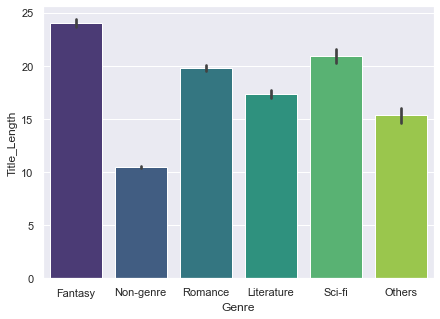

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data=df, x="Genre", y="Title_Length", palette="viridis")

Fantasy web novels have longer titles than other genres on average.
### Average title length by year

<AxesSubplot:xlabel='Year', ylabel='Title_Length'>

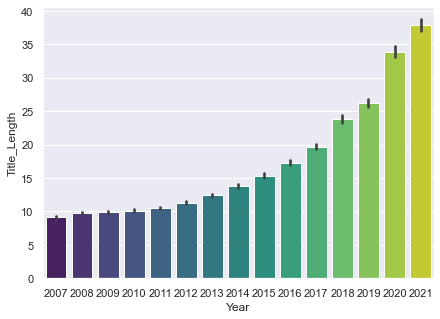

In [7]:
sns.barplot(data=df, x="Year", y="Title_Length", palette="viridis")

Average title length has been increasing overtime.
### Title Length Distribution

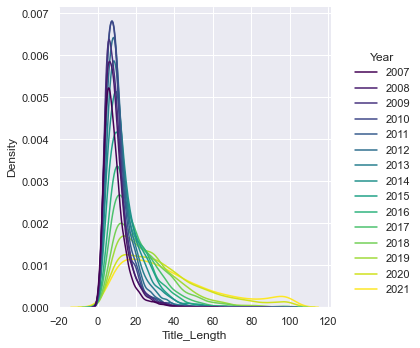

In [8]:
sns.displot(df, x="Title_Length", hue="Year", kind="kde", palette="viridis")

## OLS regression analysis

In [9]:
from statsmodels.formula.api import ols
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# create dummy variables for genres
dummy = pd.get_dummies(df['Genre'])
dummy = dummy.rename(columns={"Non-genre": "Non_genre", "Sci-fi": "Sci_fi"})
dummy.head()

,Fantasy,Literature,Non_genre,Others,Romance,Sci_fi
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


### Create dummy variabes and interaction terms

In [10]:
# dummy variabes
df1 = pd.concat([df, dummy], axis=1)
df1.drop(columns=['Others'])
# interaction terms (title_length * genre)
df1['tlength_fantasy'] = df1['Title_Length']*df1['Fantasy']
df1['tlength_literature'] = df1['Title_Length']*df1['Literature']
df1['tlength_nongenre'] = df1['Title_Length']*df1['Non_genre']
df1['tlength_romance'] = df1['Title_Length']*df1['Romance']
df1['tlength_scifi'] = df1['Title_Length']*df1['Sci_fi']

### Regression of Title Length on Weekly Viewers

In [11]:
df2 = df1[df1['Weekly_Viewers'] > 100]

model1 = ols('Weekly_Viewers ~ Title_Length',data=df2).fit()
model2 = ols('Weekly_Viewers ~ Title_Length + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df2).fit()
model3 = ols('Weekly_Viewers ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df2).fit()
model4 = ols('Weekly_Viewers ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update + tlength_fantasy + tlength_literature + tlength_nongenre + tlength_romance + tlength_scifi',data=df2).fit()

stargazer = Stargazer([model1, model2, model3, model4])
stargazer.rename_covariates({'np.power(Title_Length, 2)': 'Title_length_squared',
                             'tlength_fantasy': 'Title length x Fantasy',
                             'tlength_literature': 'Title length x Literature',
                             'tlength_nongenre': 'Title length x Non-genre',
                             'tlength_romance': 'Title length x Romance',
                             'tlength_scifi': 'Title length x Sci-fi'})
stargazer.covariate_order(['Intercept','Title_Length','np.power(Title_Length, 2)','Fantasy','Literature','Non_genre','Romance','Sci_fi','tlength_fantasy','tlength_literature','tlength_nongenre','tlength_romance','tlength_scifi','Parts','Complete','No_update'])
HTML(stargazer.render_html())



### Regression of Title Length on Average Score

In [12]:
model5 = ols('Average_Score ~ Title_Length',data=df1).fit()
model6 = ols('Average_Score ~ Title_Length + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df1).fit()
model7 = ols('Average_Score ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df1).fit()
model8 = ols('Average_Score ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update + tlength_fantasy + tlength_literature + tlength_nongenre + tlength_romance + tlength_scifi',data=df1).fit()

stargazer = Stargazer([model5, model6, model7, model8])
stargazer.rename_covariates({'np.power(Title_Length, 2)': 'Title_length_squared',
                             'tlength_fantasy': 'Title length x Fantasy',
                             'tlength_literature': 'Title length x Literature',
                             'tlength_nongenre': 'Title length x Non-genre',
                             'tlength_romance': 'Title length x Romance',
                             'tlength_scifi': 'Title length x Sci-fi'})
stargazer.covariate_order(['Intercept','Title_Length','np.power(Title_Length, 2)','Fantasy','Literature','Non_genre','Romance','Sci_fi','tlength_fantasy','tlength_literature','tlength_nongenre','tlength_romance','tlength_scifi','Parts','Complete','No_update'])
HTML(stargazer.render_html())



### Regression of Title Length on Number of Bookmarks

In [13]:
model9 = ols('Bookmarks ~ Title_Length',data=df1).fit()
model10 = ols('Bookmarks ~ Title_Length + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df1).fit()
model11 = ols('Bookmarks ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df1).fit()
model12 = ols('Bookmarks ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update + tlength_fantasy + tlength_literature + tlength_nongenre + tlength_romance + tlength_scifi',data=df1).fit()

stargazer = Stargazer([model9, model10, model11, model12])
stargazer.rename_covariates({'np.power(Title_Length, 2)': 'Title_length_squared',
                             'tlength_fantasy': 'Title length x Fantasy',
                             'tlength_literature': 'Title length x Literature',
                             'tlength_nongenre': 'Title length x Non-genre',
                             'tlength_romance': 'Title length x Romance',
                             'tlength_scifi': 'Title length x Sci-fi'})
stargazer.covariate_order(['Intercept','Title_Length','np.power(Title_Length, 2)','Fantasy','Literature','Non_genre','Romance','Sci_fi','tlength_fantasy','tlength_literature','tlength_nongenre','tlength_romance','tlength_scifi','Parts','Complete','No_update'])
HTML(stargazer.render_html())



### Regression of Title Length on Number of Reviews

In [14]:
model13 = ols('Reviews ~ Title_Length',data=df1).fit()
model14 = ols('Reviews ~ Title_Length + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df1).fit()
model15 = ols('Reviews ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update',data=df1).fit()
model16 = ols('Reviews ~ Title_Length + np.power(Title_Length, 2) + Fantasy + Literature + Non_genre + Romance + Sci_fi + C(Year) + Parts + Complete + No_update + tlength_fantasy + tlength_literature + tlength_nongenre + tlength_romance + tlength_scifi',data=df1).fit()

stargazer = Stargazer([model13, model14, model15, model16])
stargazer.rename_covariates({'np.power(Title_Length, 2)': 'Title_length_squared',
                             'tlength_fantasy': 'Title length x Fantasy',
                             'tlength_literature': 'Title length x Literature',
                             'tlength_nongenre': 'Title length x Non-genre',
                             'tlength_romance': 'Title length x Romance',
                             'tlength_scifi': 'Title length x Sci-fi'})
stargazer.covariate_order(['Intercept','Title_Length','np.power(Title_Length, 2)','Fantasy','Literature','Non_genre','Romance','Sci_fi','tlength_fantasy','tlength_literature','tlength_nongenre','tlength_romance','tlength_scifi','Parts','Complete','No_update'])
HTML(stargazer.render_html())